In [1]:
###################### Data Manipulation ####################

import pandas as pd
import numpy as np

###################### Data Visualization ###################

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
################# Load Data ####################
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 1000
Survey = pd.read_csv(r"C:\Users\kseni\Documents\Dataset\brfss_for_bda_2021.csv", encoding='cp1252',low_memory=False)
Survey.head()
print(Survey.columns)

Index(['_STATE', '_GEOSTR', '_DENSTR2', 'PRECALL', 'SECSCRFL', 'REPNUM',
       'REPDEPTH', 'FMONTH', 'IDATE', 'IMONTH',
       ...
       'PPS_45', 'PPS_46', 'PPS_48', 'PPS_52', 'childage', 'cracorg1',
       '_prace1', 'mracasc1', '_impcty', 'mracorg1'],
      dtype='object', length=414)


In [5]:
# Research Question 1
#Can health, demographical, and behavioural factors of non-institutionalized adults in the US, impact on 
#predicting the Coronary Heart Diseases (CHD)? 

#_RFCHOL - Calculated variable for adults who have had their cholesterol checked and have been told by a doctor, nurse, or other health professional that it was high
#_RFHYPE5 - Calculated variable for adults who have been told they have high blood pressure by a doctor, nurse, or other health professional. 
#_SMOKER3 - Calculated variable for four-level smoker status: everyday smoker, someday smoker, former smoker, non-smoker
#DIABETE3 - Has a doctor, nurse, or other health professional ever told you have diabetes?
#_AGEG5YR - Calculated variable for fourteen-level age category.
#FTJUDA1_ - Calculated variable for fruit juice intake in times per day. 
#BEANDAY_ - Calculated variable for bean intake in times per day
#GRENDAY_ - Calculated variable for dark green vegetable intake in times per day
#ORNGDAY_ - Calculated variable for orange-colored vegetable intake in times per day
#VEGEDA1_ - Calculated variable for vegetable intake in times per day
#_TOTINDA - Calculated variable for adults who reported doing physical activity or exercise during the past 30 days other than their regular job
#DRNKANY5 -Calculated variable for adults who reported having had at least one drink of alcohol in the past 30 days.
#_RFBING5 - Calculated variable for binge drinkers (males having five or more drinks on one occasion, females having four or more drinks on one occasion)
#_RFDRHV5 -Calculated variable for heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week).
#_MICHD - Calculated variable for respondents that have ever reported having coronary heart disease

HeartDiseaseDataset = Survey[['_RFCHOL', '_RFHYPE5', '_SMOKER3','DIABETE3', '_AGEG5YR', 'FTJUDA1_' , 'BEANDAY_' , 'GRENDAY_' , 'ORNGDAY_' , 'VEGEDA1_' , '_TOTINDA' ,'DRNKANY5' ,'_RFBING5' , '_RFDRHV5' ,'_MICHD']]

HeartDiseaseDataset = HeartDiseaseDataset.rename({'_RFCHOL': 'Colestrol', '_RFHYPE5': 'High Blood Pressure' ,'_SMOKER3': 'Smoker Status','DIABET3': 'Diabetese','_AGEG5YR': 'Age Category','_TOTINDA': 'Regular Exercise','DRNKANY5': 'Drunker status','_RFBING5': 'Being Drinkers','_MICHD': 'Heart_Disease'}, axis=1)

HeartDiseaseDataset = HeartDiseaseDataset.rename({'FTJUDA1_': 'Fruit juice intake', 'BEANDAY_': 'Bean intake' ,'GRENDAY_': 'Dark green vegetable intake','ORNGDAY_': 'Orange color vege. intake','VEGEDA1_': 'Vegetable intake','_TOTINDA': 'Regular Exercise','DRNKANY5': 'Drunker status','_RFDRHV5': 'Heavy Drinkers'}, axis=1)

#Writing a dataframe to excel
datatoexcel = pd.ExcelWriter(r'C:\Users\kseni\Documents\Dataset\Q1.xlsx')
  
# write DataFrame to excel
HeartDiseaseDataset.to_excel(datatoexcel)
  
# save the excel
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

HeartDiseaseDataset.info()

DataFrame is written to Excel File successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12338 entries, 0 to 12337
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Colestrol                    12338 non-null  object 
 1   High Blood Pressure          12338 non-null  object 
 2   Smoker Status                12338 non-null  object 
 3   DIABETE3                     12338 non-null  object 
 4   Age Category                 12338 non-null  object 
 5   Fruit juice intake           11052 non-null  float64
 6   Bean intake                  11028 non-null  float64
 7   Dark green vegetable intake  11042 non-null  float64
 8   Orange color vege. intake    11022 non-null  float64
 9   Vegetable intake             10916 non-null  float64
 10  Regular Exercise             12338 non-null  object 
 11  Drunker status               12338 non-null  object 
 12  Being Drinkers           

In [86]:
# The columns with categorical variables don't show that it contains null values. Hence, replacing strings which containg the word, Missing/Don't know with null values

#HeartDiseaseDataset.info()
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

for col in HeartDiseaseDataset:
    if (is_string_dtype(HeartDiseaseDataset[col])):
        print(HeartDiseaseDataset[col].name)
        print(HeartDiseaseDataset[col].unique())
        HeartDiseaseDataset[col][HeartDiseaseDataset[col].str.contains('Missing|Not Sure|Refused')] = np.NaN
        print(HeartDiseaseDataset[col].unique())
        
    else:
        print(HeartDiseaseDataset[col].name)
        
        if (HeartDiseaseDataset[col].name == 'Heavy Drinkers'):
            HeartDiseaseDataset.loc[HeartDiseaseDataset[col] == 9, col] = np.nan
        
        print(HeartDiseaseDataset[col].unique())


Colestrol
['No' 'Yes' 'Missing' "Don't know/Not Sure Or Refused/Missing"]
['No' 'Yes' nan]
High Blood Pressure
['Yes' 'No' "Don't know/Not Sure/Refused/Missing"]
['Yes' 'No' nan]
Smoker Status
['Never smoked' 'Current smoker - now smokes some days' 'Former smoker'
 "Don't know/Refused/Missing" 'Current smoker - now smokes every day']
['Never smoked' 'Current smoker - now smokes some days' 'Former smoker'
 nan 'Current smoker - now smokes every day']
DIABETE3
['No' 'No, pre-diabetes or borderline diabetes' 'Yes'
 'Yes, but female told only during pregnancy' 'Refused'
 "Don't know/Not Sure"]
['No' 'No, pre-diabetes or borderline diabetes' 'Yes'
 'Yes, but female told only during pregnancy' nan]
Age Category
['Age 30 to 34' 'Age 45 to 49' 'Age 18 to 24' 'Age 25 to 29'
 'Age 35 to 39' "Don't know/Refused/Missing" 'Age 55 to 59' 'Age 50 to 54'
 'Age 80 or older' 'Age 40 to 44' 'Age 60 to 64' 'Age 75 to 79'
 'Age 70 to 74' 'Age 65 to 69']
['Age 30 to 34' 'Age 45 to 49' 'Age 18 to 24' 'Age 25

<ipython-input-86-83f9958c2b5f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HeartDiseaseDataset[col][HeartDiseaseDataset[col].str.contains('Missing|Not Sure|Refused')] = np.NaN
<ipython-input-86-83f9958c2b5f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HeartDiseaseDataset[col][HeartDiseaseDataset[col].str.contains('Missing|Not Sure|Refused')] = np.NaN


In [87]:
HeartDiseaseDataset.info()
#Now we can see there are many values with null values. 
#The class variable of the dataset is,_MICHD. and it contains nulls.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12338 entries, 0 to 12337
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Colestrol                    10763 non-null  object 
 1   High Blood Pressure          12294 non-null  object 
 2   Smoker Status                11666 non-null  object 
 3   DIABETE3                     12325 non-null  object 
 4   Age Category                 12141 non-null  object 
 5   Fruit juice intake           11052 non-null  float64
 6   Bean intake                  11028 non-null  float64
 7   Dark green vegetable intake  11042 non-null  float64
 8   Orange color vege. intake    11022 non-null  float64
 9   Vegetable intake             10916 non-null  float64
 10  Regular Exercise             10955 non-null  object 
 11  Drunker status               11528 non-null  object 
 12  Being Drinkers               11385 non-null  object 
 13  Heavy Drinkers  

Colestrol                      1575
High Blood Pressure              44
Smoker Status                   672
DIABETE3                         13
Age Category                    197
Fruit juice intake             1286
Bean intake                    1310
Dark green vegetable intake    1296
Orange color vege. intake      1316
Vegetable intake               1422
Regular Exercise               1383
Drunker status                  810
Being Drinkers                  953
Heavy Drinkers                  942
Heart_Disease                    99
dtype: int64


<AxesSubplot:>

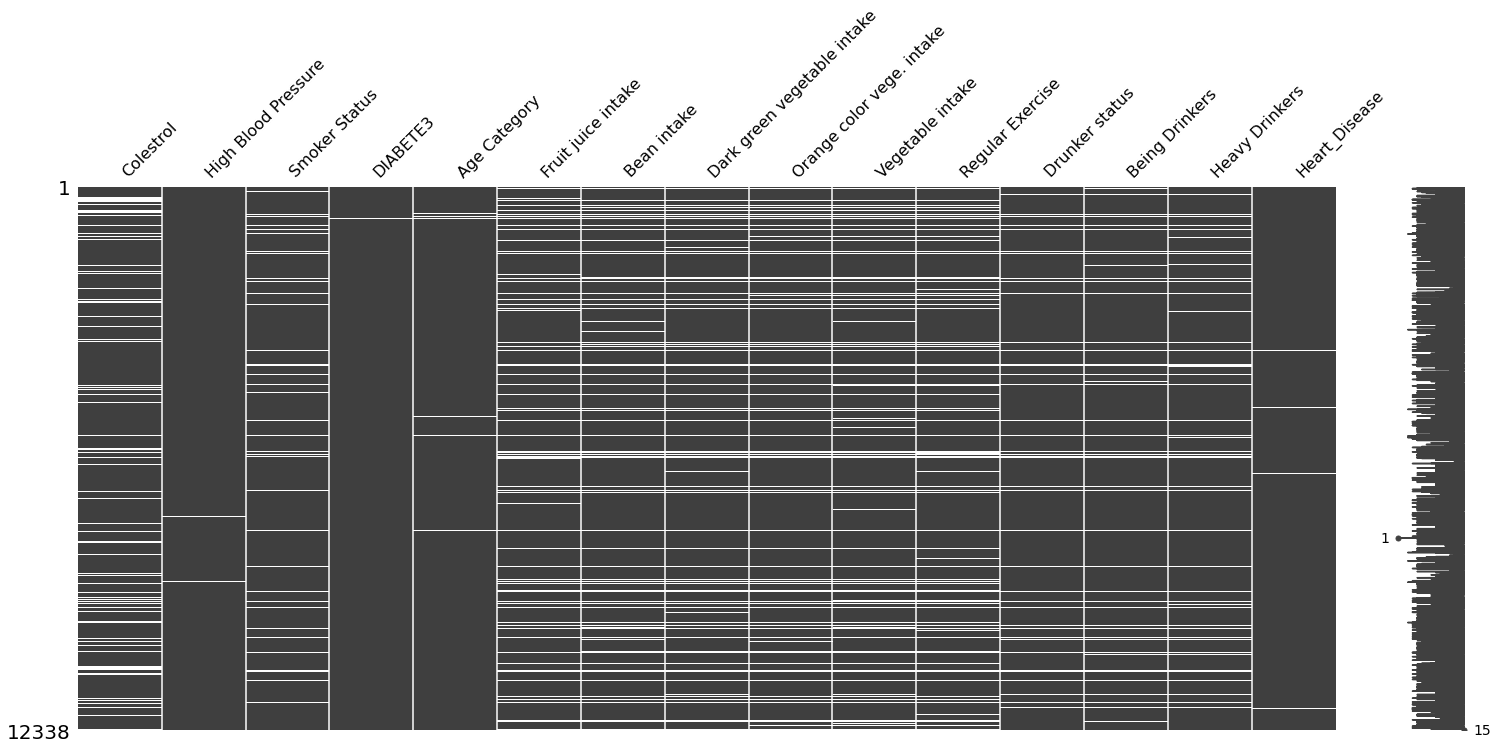

In [88]:
print(HeartDiseaseDataset.isnull().sum())

import missingno as msno
msno.matrix(HeartDiseaseDataset)

In [89]:
# Removing the rows which its class variable contains null values
HeartDiseaseDataset = HeartDiseaseDataset[HeartDiseaseDataset['Heart_Disease'].notna()]
#Now the class column doesn't contain any null values
print(HeartDiseaseDataset.isnull().sum())

Colestrol                      1551
High Blood Pressure              40
Smoker Status                   660
DIABETE3                          9
Age Category                    190
Fruit juice intake             1263
Bean intake                    1287
Dark green vegetable intake    1278
Orange color vege. intake      1297
Vegetable intake               1401
Regular Exercise               1365
Drunker status                  797
Being Drinkers                  938
Heavy Drinkers                  929
Heart_Disease                     0
dtype: int64


In [90]:
 #missing percentage
HeartDiseaseDataset.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Colestrol                      12.67
Vegetable intake               11.45
Regular Exercise               11.15
Orange color vege. intake      10.60
Bean intake                    10.52
Dark green vegetable intake    10.44
Fruit juice intake             10.32
Being Drinkers                  7.66
Heavy Drinkers                  7.59
Drunker status                  6.51
Smoker Status                   5.39
Age Category                    1.55
High Blood Pressure             0.33
DIABETE3                        0.07
Heart_Disease                   0.00
dtype: float64

In [91]:
#Imputing missing values.

for col in HeartDiseaseDataset:
    if (is_string_dtype(HeartDiseaseDataset[col])):
        #Replace missing values from the mode in categorical variables
        HeartDiseaseDataset[col].fillna(HeartDiseaseDataset[col].mode()[0], inplace=True)
    else:
        #Replace missing values from interpolate method
        HeartDiseaseDataset[col].interpolate(method='linear', direction = 'forward', inplace=True) 

In [92]:
 #missing percentages after replacing null values.
print(HeartDiseaseDataset.isnull().mean().round(4).mul(100).sort_values(ascending=False))

print(HeartDiseaseDataset.info())

# Searching the unique values of categorical variables
for col in HeartDiseaseDataset:
    if (is_string_dtype(HeartDiseaseDataset[col])):
        print(HeartDiseaseDataset[col].name)
        print(HeartDiseaseDataset[col].unique())

Heart_Disease                  0.0
Heavy Drinkers                 0.0
Being Drinkers                 0.0
Drunker status                 0.0
Regular Exercise               0.0
Vegetable intake               0.0
Orange color vege. intake      0.0
Dark green vegetable intake    0.0
Bean intake                    0.0
Fruit juice intake             0.0
Age Category                   0.0
DIABETE3                       0.0
Smoker Status                  0.0
High Blood Pressure            0.0
Colestrol                      0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12239 entries, 0 to 12337
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Colestrol                    12239 non-null  object 
 1   High Blood Pressure          12239 non-null  object 
 2   Smoker Status                12239 non-null  object 
 3   DIABETE3                     12239 non-null  object 
 4 

In [93]:
HeartDiseaseDataset.describe()

,Fruit juice intake,Bean intake,Dark green vegetable intake,Orange color vege. intake,Vegetable intake,Heavy Drinkers
count,12239.000000,12239.00000,12239.000000,12239.00000,12239.000000,12239.000000
mean,42.601642,27.12881,63.536727,31.32568,77.132936,1.055887
std,68.082406,42.41291,59.162108,38.02846,62.603325,0.225283
min,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000
25%,0.000000,3.00000,28.500000,8.50000,33.000000,1.000000
50%,14.000000,14.00000,50.000000,17.00000,67.000000,1.000000
75%,71.000000,33.00000,100.000000,43.00000,100.000000,1.000000
max,2500.000000,2200.00000,800.000000,500.00000,700.000000,2.000000


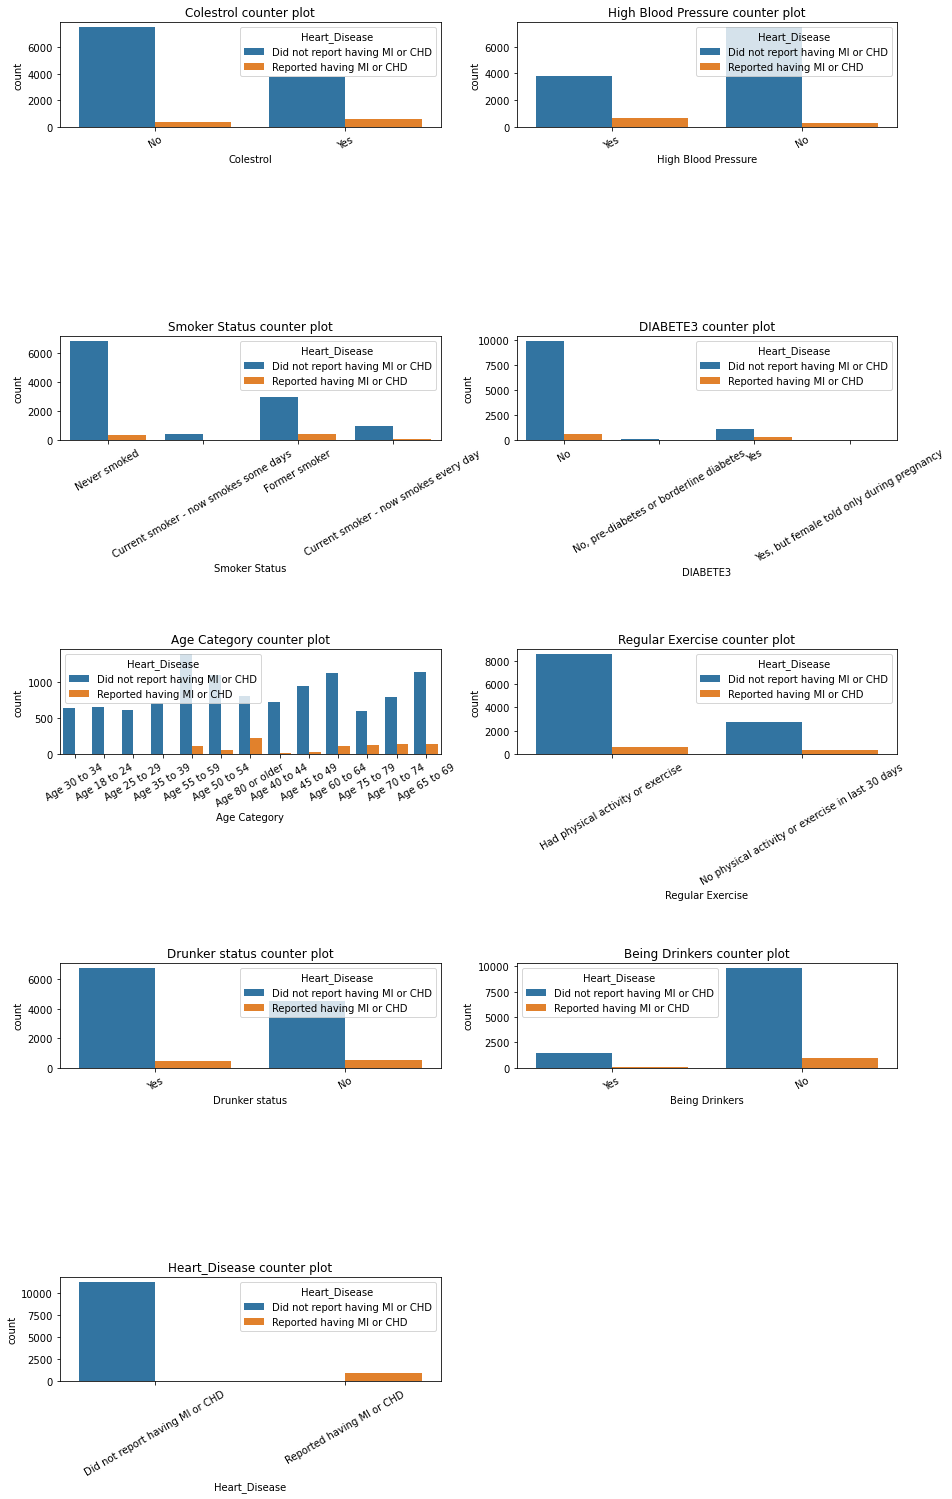

According to the below results we can conclude that the target cariable is highly imbalanced
Did not report having MI or CHD    92.180734
Reported having MI or CHD           7.819266
Name: Heart_Disease, dtype: float64


In [94]:
#HeartDiseaseDataset['_MICHD'].value_counts().head(10).plot.bar()

#  Categorical Data
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,25))
plt.subplots_adjust(hspace = 2)

for col in HeartDiseaseDataset:
    if (is_string_dtype(HeartDiseaseDataset[col])):
        plt.subplot(a, b, c)
        plt.title('{} counter plot'.format(HeartDiseaseDataset[col].name))
        plt.xlabel(HeartDiseaseDataset[col].name)
        #Replace missing values from the mode in categorical variables
        g=sns.countplot(x=HeartDiseaseDataset[col], data=HeartDiseaseDataset, hue='Heart_Disease')
        g.tick_params(axis='x', rotation=30)
        c = c + 1
        
plt.show()

print("According to the below results we can conclude that the target cariable is highly imbalanced")
print(HeartDiseaseDataset['Heart_Disease'].value_counts(normalize=True) * 100)



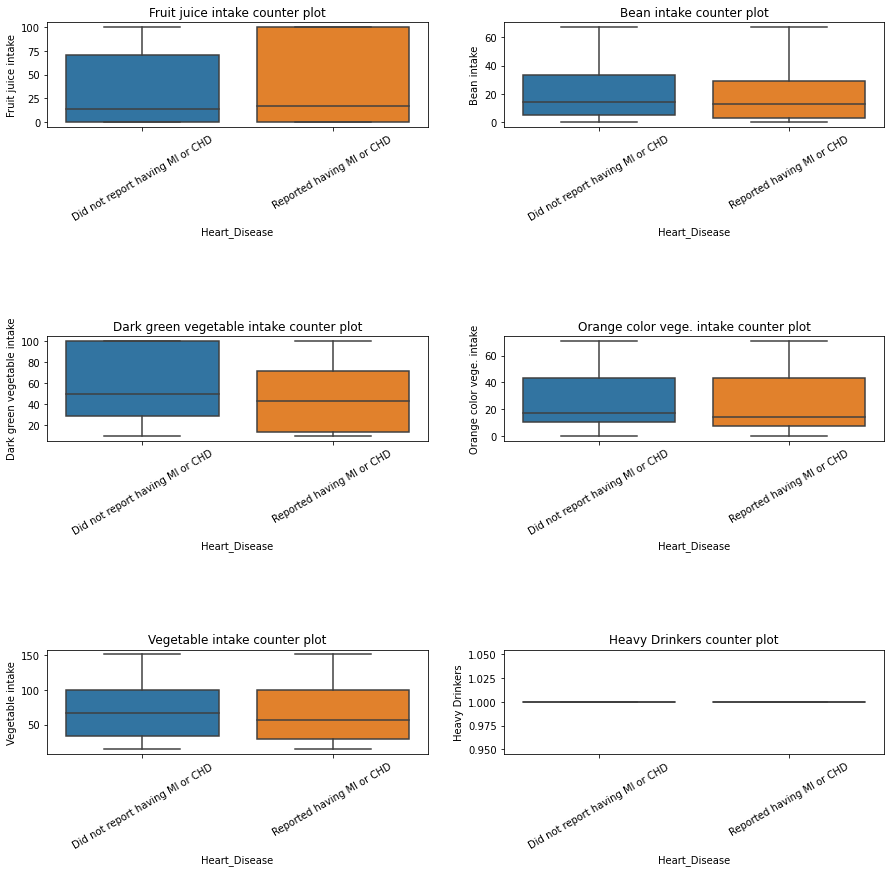

In [95]:


#plt.figure(figsize=(10,10))
#h=sns.boxplot(data=HeartDiseaseDataset_numerical)
#h.tick_params(axis='x', rotation=30)

#  Categorical Data
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,25))
plt.subplots_adjust(hspace = 2)

for col in HeartDiseaseDataset:
    if (not is_string_dtype(HeartDiseaseDataset[col])):
        lower=HeartDiseaseDataset[col].quantile(0.10)
        max=HeartDiseaseDataset[col].quantile(0.90)
        HeartDiseaseDataset[col] = np.where(HeartDiseaseDataset[col] <lower, lower,HeartDiseaseDataset[col])
        HeartDiseaseDataset[col] = np.where(HeartDiseaseDataset[col] >max, max,HeartDiseaseDataset[col])
        plt.subplot(a, b, c)
        plt.title('{} counter plot'.format(HeartDiseaseDataset[col].name))
        plt.xlabel(HeartDiseaseDataset[col].name)
        #Replace missing values from the mode in categorical variables
        g=sns.boxplot(x='Heart_Disease',y=HeartDiseaseDataset[col], data=HeartDiseaseDataset)
        g.tick_params(axis='x', rotation=30)
        c = c + 1
        
plt.show()

In [96]:
Q1 = HeartDiseaseDataset._get_numeric_data().quantile(0.25)
Q3 = HeartDiseaseDataset._get_numeric_data().quantile(0.75)
IQR = Q3 - Q1

((HeartDiseaseDataset._get_numeric_data() < (HeartDiseaseDataset._get_numeric_data() - 3 * IQR)) | (HeartDiseaseDataset._get_numeric_data() > (Q3 + 3 * IQR))).sum()

Fruit juice intake             0
Bean intake                    0
Dark green vegetable intake    0
Orange color vege. intake      0
Vegetable intake               0
Heavy Drinkers                 0
dtype: int64

In [97]:

#Our dataset consists of categorical as well as numerical variables. To fit the categorical data into the model lets encode the categorical variables
import category_encoders as ce

#Using the label encoding approach

# Searching the unique values of categorical variables to encode them using label encoding approach
for col in HeartDiseaseDataset:
    if (is_string_dtype(HeartDiseaseDataset[col]) and HeartDiseaseDataset[col].name!='Heart_Disease'):
        HeartDiseaseDataset[col] = HeartDiseaseDataset[col].astype('category')
        HeartDiseaseDataset[col] = HeartDiseaseDataset[col].cat.codes

HeartDiseaseDataset.head()

,Colestrol,High Blood Pressure,Smoker Status,DIABETE3,Age Category,Fruit juice intake,Bean intake,Dark green vegetable intake,Orange color vege. intake,Vegetable intake,Regular Exercise,Drunker status,Being Drinkers,Heavy Drinkers,Heart_Disease
0,0,1,3,0,2,29.0,3.0,33.0,10.0,71.0,0,1,1,1.0,Did not report having MI or CHD
2,1,0,3,0,2,0.0,0.0,43.0,29.0,43.0,0,1,0,1.0,Did not report having MI or CHD
3,0,0,3,0,0,0.0,50.0,100.0,50.0,71.5,0,0,0,1.0,Did not report having MI or CHD
4,0,0,3,0,1,0.0,67.0,100.0,71.0,100.0,0,1,1,1.0,Did not report having MI or CHD
5,1,0,1,0,3,0.0,55.0,100.0,37.0,75.0,0,1,1,1.0,Did not report having MI or CHD


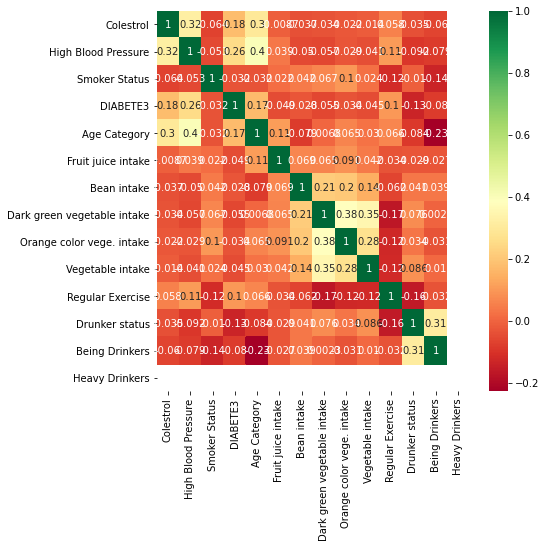

In [98]:
#Feature selection
#Correlation Matrix with Heatmap

#get correlations of each features in dataset
corrmat = HeartDiseaseDataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
#plot heat map
g=sns.heatmap(HeartDiseaseDataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# It seems no strong correlation between features in the dataset

In [99]:
# Separate input features and target
#'_RFBING5' , '_RFDRHV5', '_TOTINDA', 'DRNKANY5' , '_RFCHOL'
from sklearn.model_selection import train_test_split

HeartDiseaseDataset=HeartDiseaseDataset.drop(['Fruit juice intake'], axis=1)

y = HeartDiseaseDataset.Heart_Disease
X = HeartDiseaseDataset.drop('Heart_Disease', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
have_CHD = X[X.Heart_Disease=='Reported having MI or CHD']
not_Having_CHD = X[X.Heart_Disease=='Did not report having MI or CHD']

In [100]:
#When the target variable is highly imbalanced, accuracy is not a good measurement to evaluate the model. We must focus on evaluation 
# metrices such as f-score, recall and precision. The model must focus more on predicting the lower target level class

#Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
#Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier's exactness. Low precision indicates a high number of false positives.
#Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier's completeness. Low recall indicates a high number of false negatives.
#F1: Score: the weighted average of precision and recall.

import sklearn
from imblearn import under_sampling, over_sampling
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks


from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression

In [102]:

# upsample minority
CHD_upsampled = resample(have_CHD,
                          replace=True, # sample with replacement
                          n_samples=len(not_Having_CHD), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_Having_CHD, CHD_upsampled])

# check new class counts
upsampled.Heart_Disease.value_counts()

# trying logistic regression again with the balanced dataset
y_train_upsample = upsampled.Heart_Disease
X_train_upsample = upsampled.drop('Heart_Disease', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train_upsample, y_train_upsample)

upsampled_pred = upsampled.predict(X_test)
# Checking accuracy
print('Accuracy ',accuracy_score(y_test, upsampled_pred))

print('Recall ',recall_score(y_test, upsampled_pred, average="binary", pos_label="Reported having MI or CHD"))

# f1 score
print('F1 score ',f1_score(y_test, upsampled_pred, average="binary", pos_label="Reported having MI or CHD"))

# confusion matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

Accuracy  0.7058823529411765
Recall  0.78099173553719
F1 score  0.2957746478873239


,0,1
0,1971,847
1,53,189


In [106]:
# Undersampling Majority Class

# downsample majority
Not_CHD_downsampled = resample(not_Having_CHD,
                                replace = False, # sample without replacement
                                n_samples = len(have_CHD), # match minority n
                                random_state = 42) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([have_CHD, Not_CHD_downsampled])

# checking counts
downsampled.Heart_Disease.value_counts()

# trying logistic regression again with the undersampled dataset

y_train_downsample = downsampled.Heart_Disease
X_train_downsample = downsampled.drop('Heart_Disease', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train_downsample, y_train_downsample)

undersampled_pred = undersampled.predict(X_test)

# Checking accuracy
print('Accuracy ', accuracy_score(y_test, undersampled_pred))

print('Recall ', recall_score(y_test, undersampled_pred, average="binary", pos_label="Reported having MI or CHD"))

# f1 score
print('F1 score ',f1_score(y_test, undersampled_pred, average="binary", pos_label="Reported having MI or CHD"))

# confusion matrix
pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

Accuracy  0.6934640522875817
Recall  0.7851239669421488
F1 score  0.28831562974203345


,0,1
0,1932,886
1,52,190


In [107]:
#Generate Synthetic Samples
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

smote = LogisticRegression(solver='liblinear').fit(X_train_smote, y_train_smote)

smote_pred = smote.predict(X_test)

# Checking accuracy
print('Accuracy ', accuracy_score( y_test, smote_pred))

print('Recall ', recall_score(y_test, smote_pred, average="binary", pos_label="Reported having MI or CHD"))

# f1 score
print('F1 score ',f1_score(y_test, smote_pred, average="binary", pos_label="Reported having MI or CHD"))

# confustion matrix
pd.DataFrame(confusion_matrix(y_test, smote_pred))

Accuracy  0.7058823529411765
Recall  0.6198347107438017
F1 score  0.25


,0,1
0,2010,808
1,92,150


In [108]:
# SMOTE + ENN algorithm

smee = SMOTEENN(random_state = 60)
X_train_smoteenn, y_train_smoteenn = smee.fit_resample(X_train, y_train)

smote = LogisticRegression(solver='liblinear').fit(X_train_smoteenn, y_train_smoteenn)

smoteenn_pred = smote.predict(X_test)

# Checking accuracy
print('Accuracy ', accuracy_score(y_test, smoteenn_pred))

print('Recall ', recall_score(y_test, smoteenn_pred, average="binary", pos_label="Reported having MI or CHD"))

# f1 score
print('F1 score ',f1_score(y_test, smoteenn_pred, average="binary", pos_label="Reported having MI or CHD"))

# confustion matrix
pd.DataFrame(confusion_matrix(y_test, smoteenn_pred))

Accuracy  0.6535947712418301
Recall  0.7396694214876033
F1 score  0.2524682651622003


,0,1
0,1821,997
1,63,179
